# Let's start by checking out the data that we have

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./RD_Audio_DeepFake_classifier/KAGGLE/DATASET-balanced.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         11778 non-null  float64
 1   rms                 11778 non-null  float64
 2   spectral_centroid   11778 non-null  float64
 3   spectral_bandwidth  11778 non-null  float64
 4   rolloff             11778 non-null  float64
 5   zero_crossing_rate  11778 non-null  float64
 6   mfcc1               11778 non-null  float64
 7   mfcc2               11778 non-null  float64
 8   mfcc3               11778 non-null  float64
 9   mfcc4               11778 non-null  float64
 10  mfcc5               11778 non-null  float64
 11  mfcc6               11778 non-null  float64
 12  mfcc7               11778 non-null  float64
 13  mfcc8               11778 non-null  float64
 14  mfcc9               11778 non-null  float64
 15  mfcc10              11778 non-null  float64
 16  mfcc

In [4]:
df.head()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060,FAKE
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421,FAKE
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001,FAKE
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857,FAKE
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998,FAKE


## Cool to see we are given this, let's try to extract it on our own

In [8]:
! pip install librosa

     |████████████████████████████████| 253 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 413 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 5.2 MB/s  eta 0:00:01


In [9]:
import librosa
import numpy as np

# Load the audio file
audio_path = './RD_Audio_DeepFake_classifier/KAGGLE/AUDIO/REAL/biden-original.wav'
y, sr = librosa.load(audio_path)

# Extracting features
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20) 

mfcc1 = mfccs[0, :]
mfcc2 = mfccs[1, :]
mfcc3 = mfccs[2, :]
mfcc4 = mfccs[3, :]
mfcc5 = mfccs[4, :]
mfcc6 = mfccs[5, :]
mfcc7 = mfccs[6, :]
mfcc8 = mfccs[7, :]
mfcc9 = mfccs[8, :]
mfcc10 = mfccs[9, :]
mfcc11 = mfccs[10, :]
mfcc12 = mfccs[11, :]
mfcc13 = mfccs[12, :]
mfcc14 = mfccs[13, :]
mfcc15 = mfccs[14, :]
mfcc16 = mfccs[15, :]
mfcc17 = mfccs[16, :]
mfcc18 = mfccs[17, :]
mfcc19 = mfccs[18, :]
mfcc20 = mfccs[19, :]


labels = 'REAL'


features = np.concatenate((
    np.mean(chroma_stft, axis=1),
    np.mean(rms, axis=1),
    np.mean(spectral_centroid, axis=1),
    np.mean(spectral_bandwidth, axis=1),
    np.mean(rolloff, axis=1),
    np.mean(zero_crossing_rate, axis=1),
    np.mean(mfccs, axis=1)
), axis=0)


features_with_label = np.append(features, labels)


## I'll package that into a function and now instead of taking the mean (for testing) let's capture each step

In [11]:
import librosa
import numpy as np
import pandas as pd

def extract_audio_features_to_df(audio_path, label):
    # Load the audio file
    y, sr = librosa.load(audio_path)

    # Extracting features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Transpose the features to have frames as rows
    chroma_stft = chroma_stft.T
    rms = rms.T
    spectral_centroid = spectral_centroid.T
    spectral_bandwidth = spectral_bandwidth.T
    rolloff = rolloff.T
    zero_crossing_rate = zero_crossing_rate.T
    mfccs = mfccs.T

    # Create a DataFrame
    df = pd.DataFrame(np.hstack((chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfccs)))
    
    # Adding label column
    df['label'] = label

    return df

# Example usage:
audio_path = './RD_Audio_DeepFake_classifier/KAGGLE/AUDIO/REAL/biden-original.wav'
label = 'REAL'
audio_df = extract_audio_features_to_df(audio_path, label)

# Show the first few entries in the dataframe
print(audio_df.head())


          0         1         2         3         4         5         6  \
0  0.357717  0.600950  0.474029  1.000000  0.575484  0.175589  0.229226   
1  0.783343  0.842583  0.721364  1.000000  0.835004  0.148058  0.173541   
2  0.598924  0.472873  0.629496  0.753649  1.000000  0.276389  0.274303   
3  0.464262  0.361716  0.663938  0.991324  1.000000  0.308758  0.208722   
4  0.250066  0.149411  0.451412  1.000000  0.842665  0.226286  0.112238   

          7         8         9  ...         28        29         30  \
0  0.254678  0.331127  0.199627  ...   9.247780  6.659717   0.043603   
1  0.566608  0.546326  0.351749  ...  -0.856146  4.779579  -9.446074   
2  0.653916  0.732363  0.514083  ...  -8.987667 -2.015254 -18.974724   
3  0.508507  0.449852  0.389186  ... -12.681971 -5.168771 -19.825878   
4  0.199927  0.220377  0.175536  ... -11.574847 -6.518993 -15.258911   

          31         32         33         34        35        36  label  
0  -3.135385  -5.418370 -13.515942  -5.73

# Great we can recreate this for any audio file now...for the sake of getting this done on time I will just use the existing DF

In [14]:
labels_csv = df['LABEL']
data_csv = df.drop(columns=['LABEL'])

In [15]:
real_count = (labels_csv == 'REAL').sum()
fake_count = (labels_csv == 'FAKE').sum()

print("Number of real data: ", real_count)
print("Number of fake data: ", real_count)

Number of real data:  5889
Number of fake data:  5889


# Balanced! Let's keep going

### Let's run a PCA to see what's important here and reduce multi-collineraity. 

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Separate features and labels
X = data_csv  # Feature matrix
y = labels_csv  # Labels

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
pca = PCA()  # Keep 95% of variance
pca.fit(X_scaled)

PCA()

In [28]:
# Percentage of variance explained by each of the selected components
explained_variance_ratio = pca.explained_variance_ratio_

In [29]:
# Create a dictionary to hold the column names and their corresponding explained variance
explained_variance_dict = {X.columns[i]: explained_variance_ratio[i] * 100 for i in range(len(X.columns))}


In [30]:
# Sorting the dictionary by the highest variance explanation to lowest
explained_variance_sorted = dict(sorted(explained_variance_dict.items(), key=lambda item: item[1], reverse=True))

In [31]:
# Print the column name and its corresponding % explanation of the variance
for column, variance in explained_variance_sorted.items():
    print(f"{column}: {variance:.2f}%")

chroma_stft: 26.92%
rms: 16.90%
spectral_centroid: 15.06%
spectral_bandwidth: 6.87%
rolloff: 5.38%
zero_crossing_rate: 3.92%
mfcc1: 3.34%
mfcc2: 3.06%
mfcc3: 2.36%
mfcc4: 1.96%
mfcc5: 1.83%
mfcc6: 1.78%
mfcc7: 1.51%
mfcc8: 1.42%
mfcc9: 1.33%
mfcc10: 1.16%
mfcc11: 0.96%
mfcc12: 0.92%
mfcc13: 0.77%
mfcc14: 0.69%
mfcc15: 0.66%
mfcc16: 0.61%
mfcc17: 0.35%
mfcc18: 0.14%
mfcc19: 0.09%
mfcc20: 0.02%


## I'll drop mfcc11-20...it seems the most valueable ones are the initial ones. 

In [40]:
features_to_drop = [f'mfcc{i}' for i in range(11, 21)]
df_reduced = data_csv.drop(features_to_drop, axis=1)

In [35]:
labels_csv = labels_csv.map({'REAL': 0, 'FAKE': 1})

In [37]:
labels_csv

0        1
1        1
2        1
3        1
4        1
        ..
11773    0
11774    0
11775    0
11776    0
11777    0
Name: LABEL, Length: 11778, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_reduced
y = labels_csv

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [43]:
accuracy

0.8637521222410866

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

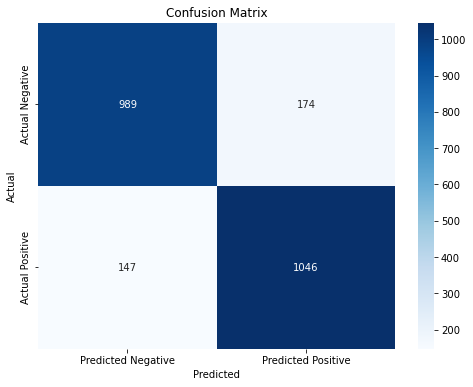

In [46]:
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Not bad at all. Let's try to beat it with Deep Learning

In [44]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-01-10 17:55:32.160805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

2024-01-10 17:57:47.050737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
236/236 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8645 - val_loss: 0.2099 - val_accuracy: 0.9257
Epoch 2/50
236/236 [==============================] - 0s 1ms/step - loss: 0.1610 - accuracy: 0.9469 - val_loss: 0.1534 - val_accuracy: 0.9432
Epoch 3/50
236/236 [==============================] - 0s 989us/step - loss: 0.1256 - accuracy: 0.9571 - val_loss: 0.1196 - val_accuracy: 0.9533
Epoch 4/50
236/236 [==============================] - 0s 997us/step - loss: 0.1037 - accuracy: 0.9635 - val_loss: 0.1060 - val_accuracy: 0.9650
Epoch 5/50
236/236 [==============================] - 0s 1ms/step - loss: 0.0876 - accuracy: 0.9701 - val_loss: 0.0922 - val_accuracy: 0.9698
Epoch 6/50
236/236 [==============================] - 0s 1ms/step - loss: 0.0780 - accuracy: 0.9739 - val_loss: 0.0820 - val_accuracy: 0.9698
Epoch 7/50
236/236 [==============================] - 0s 980us/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0762 - val_accuracy: 0.9724


In [49]:
y_pred = model.predict(X_test)

74/74 [==============================] - 0s 566us/step


In [53]:
y_pred
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

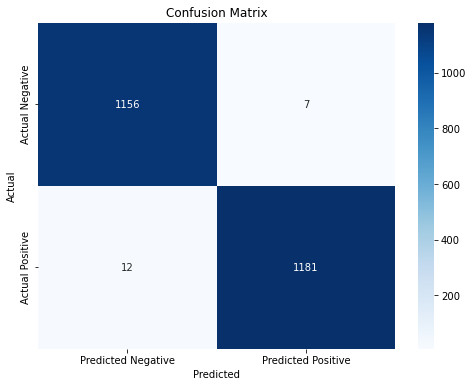

In [54]:
cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Turns out a simple Nueral Network killed this task. 